# Assignement 1, Data science in practice, MGT-415, 08.03.2020
### Aubry Yannick, Fontannaz Benoît, Muret Gabriel Pierre Etienne, Tedeschi Julien Brian, Terrier Cédric

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src import functions

## Import Data

In [2]:
data = pd.read_csv("customers.csv")

## Cleaning Dataset to keep only active loyal members

In [3]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan).astype('float32') # Force empty values to be "Nan"
data_cleaned = data[data['Churn'] == 'No'].reset_index()

## Description of the dataset
### Here we provide some information about the dataset

In [4]:
functions.describe_dataset(data_cleaned)

   index  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0      0  7590-VHVEG  Female              0     Yes         No       1   
1      1  5575-GNVDE    Male              0      No         No      34   
2      3  7795-CFOCW    Male              0      No         No      45   
3      6  1452-KIOVK    Male              0      No        Yes      22   
4      7  6713-OKOMC  Female              0      No         No      10   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2           No  No phone service             DSL  ...              Yes   
3          Yes               Yes     Fiber optic  ...               No   
4           No  No phone service             DSL  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No       

### We see that total charges is an object but it should be a float, so we check the min to spot empty value. 
### Then if every value is defined we can convert the column to float

In [5]:
    print("Total charges min: ", data_cleaned["TotalCharges"].min())
    data_cleaned["TotalCharges"] = data_cleaned["TotalCharges"].astype("float64")
    print(data_cleaned["SeniorCitizen"].head(10))  # Binary values => object
    data_cleaned["SeniorCitizen"] = data_cleaned["SeniorCitizen"].astype("object")

Total charges min:  18.8
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: SeniorCitizen, dtype: int64



 ### Mean charges are more relevant than monthly charges. Indeed, the monthly charges could have varied through the year of loyalty.
 ### So we create a new column which is the mean of the TotalCharges column


In [6]:
data_cleaned["MeanMonthlyCharges"] = data_cleaned["TotalCharges"]/data_cleaned["tenure"]



### Plot Mean charges vs every object.
### The mean charges is very interesting because it is the main source of revenue for the firm.


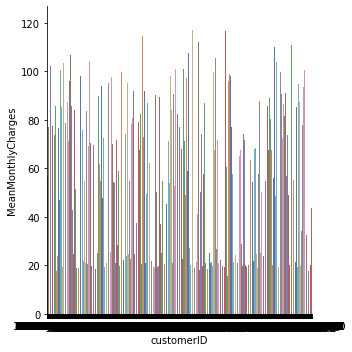

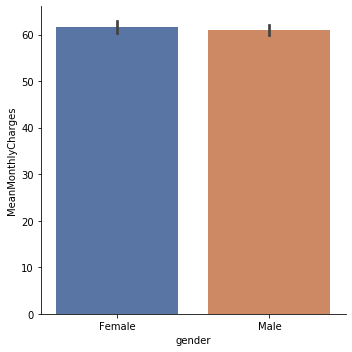

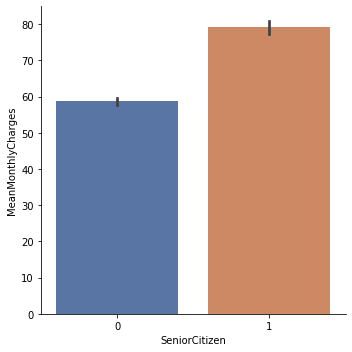

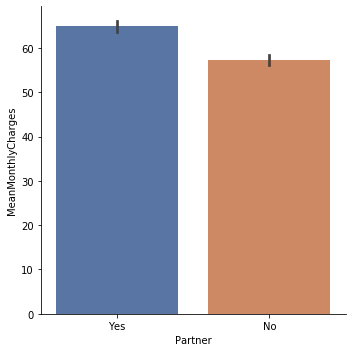

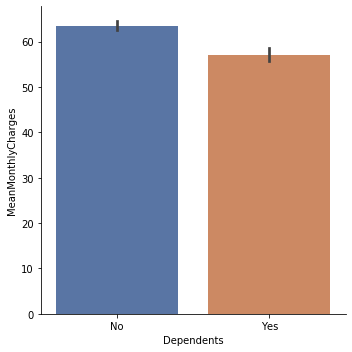

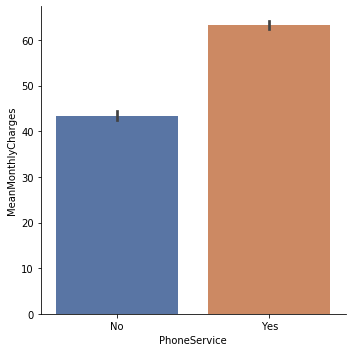

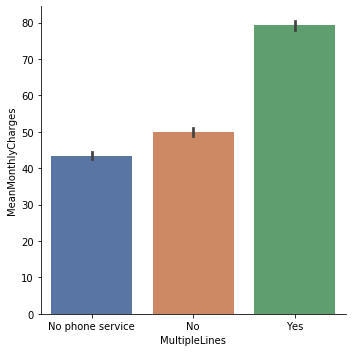

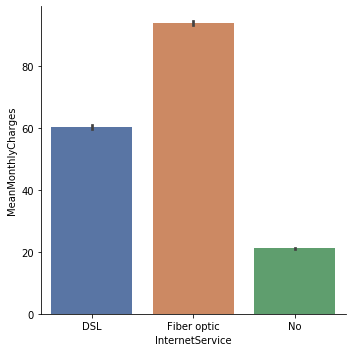

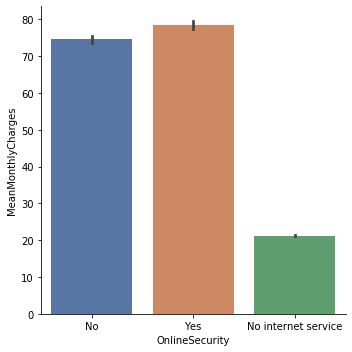

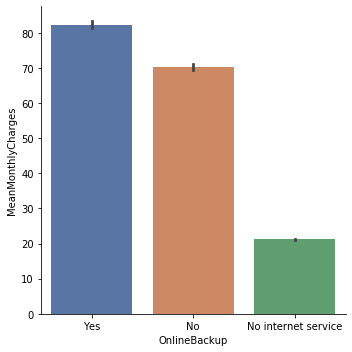

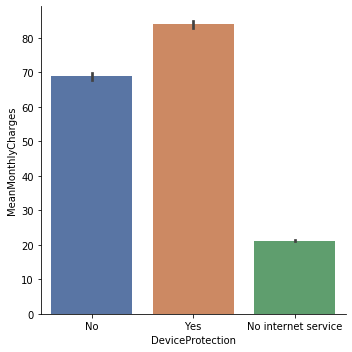

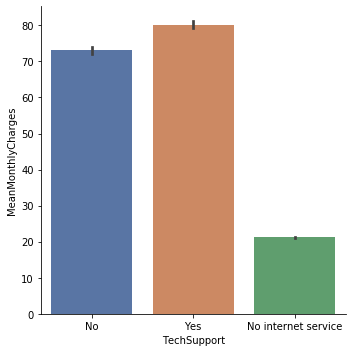

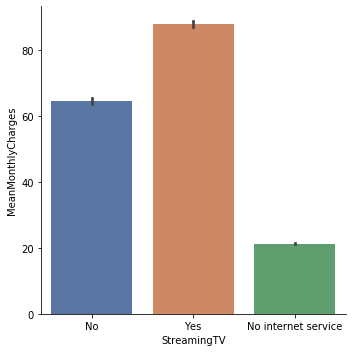

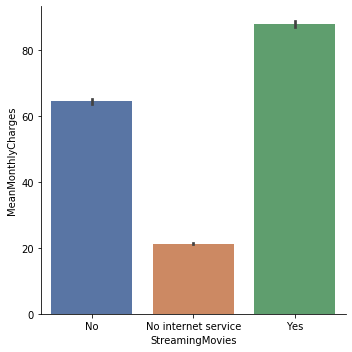

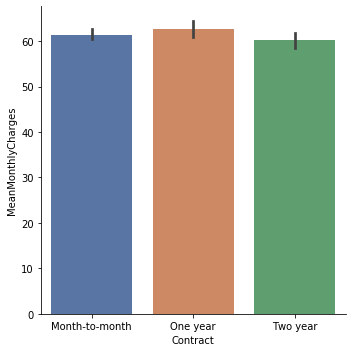

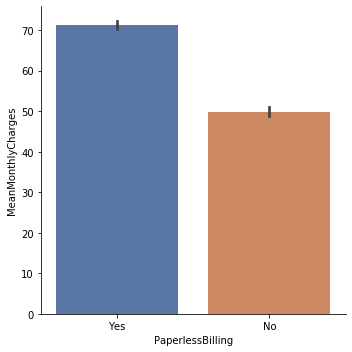

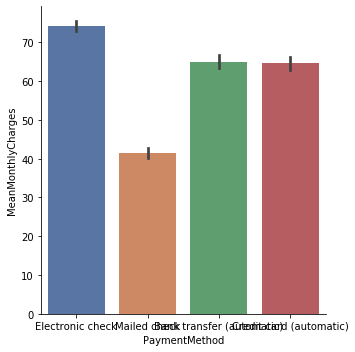

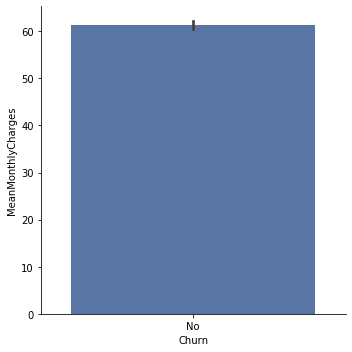

In [7]:
functions.plot_float_vs_objects(data_cleaned, "MeanMonthlyCharges")

## Distribution analysis.
### Now we do the same as the previous part but for the distribution of continous float columns.
    

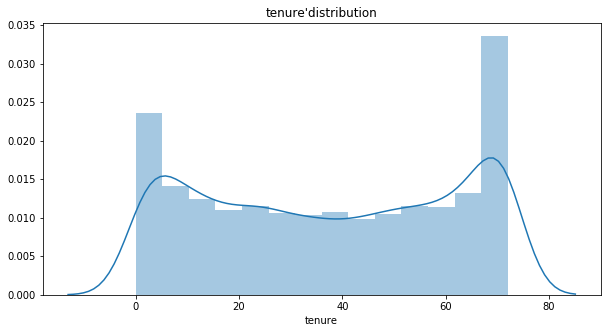

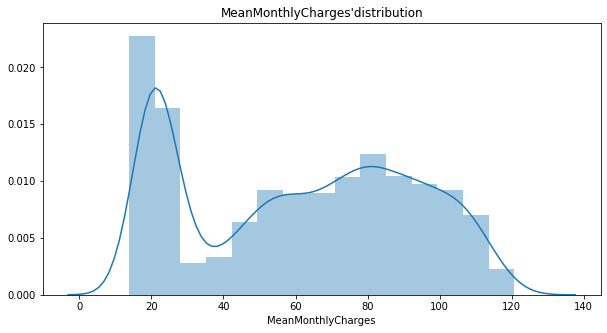

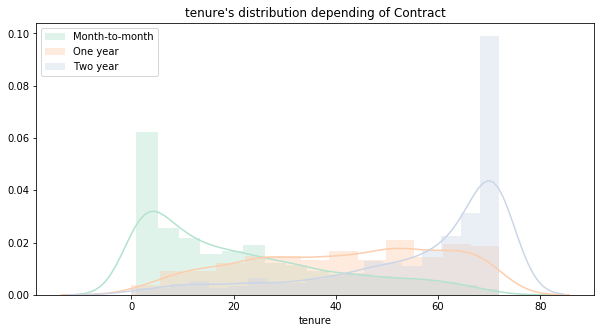

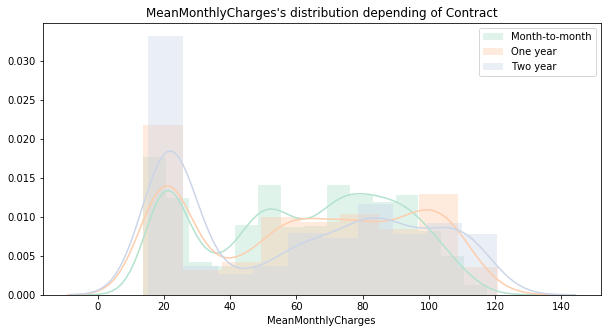

In [8]:
    functions.plot_distribution(data_cleaned, "tenure")
    functions.plot_distribution(data_cleaned, "MeanMonthlyCharges")

    functions.plot_distribution_by(data_cleaned, "tenure", "Contract")
    functions.plot_distribution_by(data_cleaned, "MeanMonthlyCharges", "Contract")


## We propose also a visualisation of the distribution of the tenure and monthly charge in 2D graphs

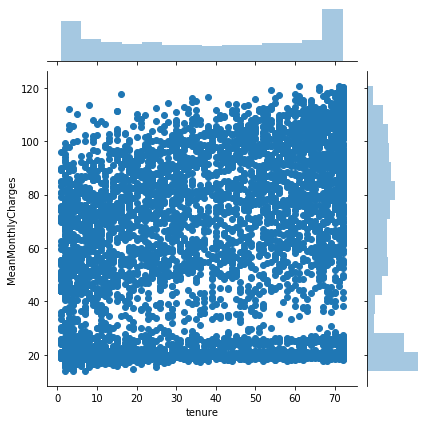

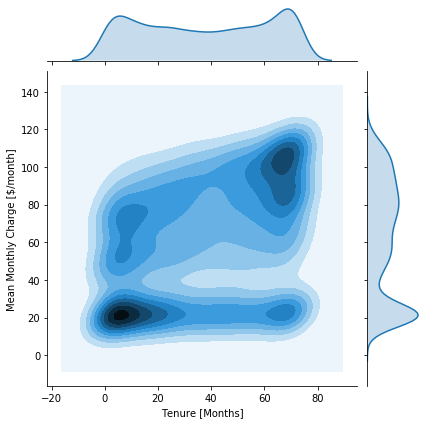

In [9]:
sns.jointplot(x=data_cleaned.tenure, y=data_cleaned.MeanMonthlyCharges)
h=sns.jointplot(x=data_cleaned.tenure, y=data_cleaned.MeanMonthlyCharges, kind='kde')

h.ax_joint.set_xlabel('Tenure [Months]')
h.ax_joint.set_ylabel('Mean Monthly Charge [$/month]')
plt.savefig('MeanMonthlyCharge_Tenure_Style.png')

## We propose to bin the data per loyalty into three categories

In [10]:
bins = np.array([0, 10, 45, data_cleaned['tenure'].max()])
group_names = ['New', 'Loyal', 'Very Loyal']
labels = pd.cut(data_cleaned['tenure'], bins, labels=group_names)

## We analyse if there is a difference in loyalty depending on the gender

gender      Female  Male
tenure                  
New            472   519
Loyal          967  1008
Very Loyal    1105  1092


<Figure size 432x288 with 0 Axes>

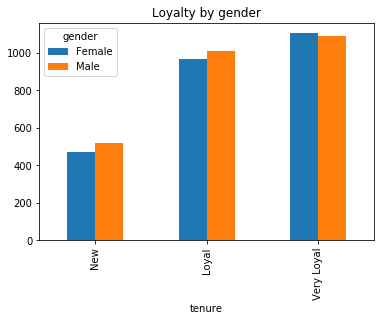

In [11]:
grouped = data_cleaned.groupby([labels, 'gender'])
Gender_loyalty = grouped.size().unstack()
fig = plt.figure()
Gender_loyalty.plot.bar(title='Loyalty by gender')
print(Gender_loyalty)

## We would like to analyse the types of services used by the customers as a function of their loyalty. Therefore, we will normalize the yes/no data from the phone services using boolean data

In [12]:
My_dict = {'Yes': 1, 'No': 0}
data_cleaned['PhoneService_int'] = data_cleaned['PhoneService'].replace("Yes", 1).replace("No", 0)

grouped2 = data_cleaned.groupby(labels)
PhoneService_norm = grouped2['PhoneService_int'].sum()/grouped2.size()
normed_infos = pd.DataFrame(PhoneService_norm, columns=['Has_PhoneService'])

## Getting the proportion on people with internet service

In [13]:
My_dict2 = {'DSL': 1, 'Fiber optic': 1, 'No': 0}
data_cleaned['InternetService_int'] = data_cleaned['InternetService'].map(My_dict2)

InternetService_norm = grouped2['InternetService_int'].sum()/grouped2.size()
normed_infos['Has_InternetService'] = InternetService_norm


props = {
    'title': 'Percent of clients who have different services per loyalty',
    'ylabel': 'Normalized "Yes"'
}


## Analyze the internet services

C:\Users\Yannick\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
No handles with labels found to put in legend.


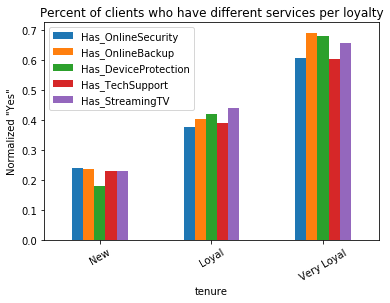

In [14]:

data_cleaned_with_internet = data_cleaned[data_cleaned['InternetService'] != 'No']
labels2 = pd.cut(data_cleaned_with_internet['tenure'], bins, labels=group_names)
grouped3 = data_cleaned_with_internet.groupby(labels2)

internet_services_df = normed_infos.copy()

for x in data_cleaned.columns[9:15]:
    new_col = x + '_int'
    data_cleaned_with_internet[new_col] = data_cleaned_with_internet[x].map(My_dict)
    
    current_norm = grouped3[new_col].sum()/grouped3.size()
    internet_services_df['Has_'+x] = current_norm
    

internet_services_df.drop(columns=['Has_InternetService', 'Has_PhoneService'], inplace=True)

props2 = {
    'title': 'Percent of clients who have different internet services per loyalty',
    'ylabel': 'Normalized "Yes"'
}


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set(**props)
ax.legend(loc='best')
internet_services_df.plot.bar(ax=ax, rot=30)

# In the following we will analyse the mean charges in relation with the loyalty and other variables

Text(0.5, 1.0, 'money spent per loyalty')

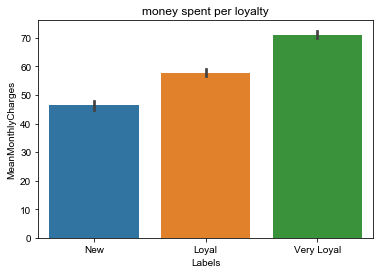

In [15]:
# money spent per loyalty
data_cleaned['Labels'] = labels
fig = plt.figure()
sns.barplot(x='Labels', y='MeanMonthlyCharges', data=data_cleaned)
sns.set(style="whitegrid")
plt.title('money spent per loyalty')

## Money spent as a function of loyalty and internet connection

Text(0.5, 1, 'Money spent vs loyalty and internet connection')

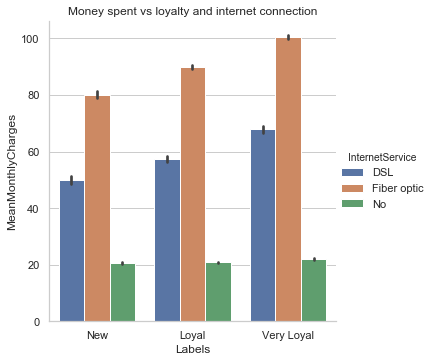

In [16]:
sns.catplot(x='Labels', y='MeanMonthlyCharges', hue='InternetService', kind="bar", data=data_cleaned)
sns.set(style="whitegrid")
plt.title('Money spent vs loyalty and internet connection')

## Do men/women spend more money ?

Text(0.5, 1, 'Money spent vs gender')

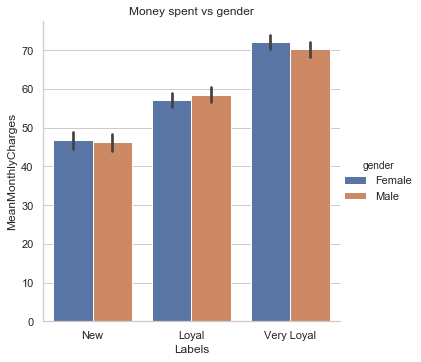

In [17]:
sns.catplot(x='Labels', y='MeanMonthlyCharges', hue='gender', kind="bar", data=data_cleaned)
sns.set(style="whitegrid")
plt.title('Money spent vs gender')

## A scatter representation shows that there are only little differences between the gender

Text(0.5, 1, 'Money spent vs gender (scatter form)')

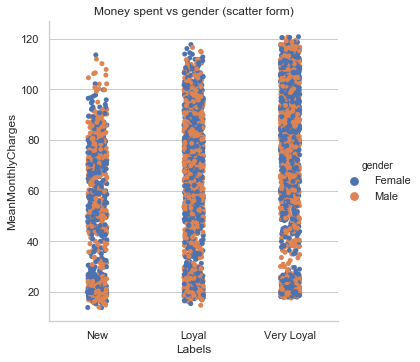

In [18]:
sns.catplot(x='Labels', y='MeanMonthlyCharges', hue='gender', data=data_cleaned)
sns.set(style="whitegrid")
plt.title('Money spent vs gender (scatter form)')


## Does the method of payment affect the monthly charge of the customers

Text(0.5, 1, 'Money spent vs payment method')

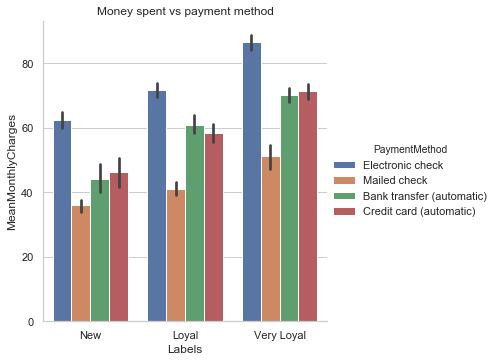

In [19]:
sns.catplot(x='Labels', y='MeanMonthlyCharges', hue='PaymentMethod', kind="bar", data=data_cleaned)
sns.set(style="whitegrid")
plt.title('Money spent vs payment method')

## The monthly charge versus the senior state

Text(0.5, 1, 'Money spent vs senior state')

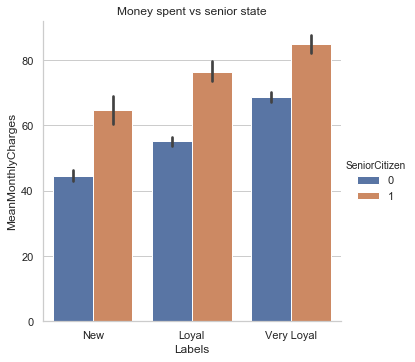

In [20]:
sns.catplot(x='Labels', y='MeanMonthlyCharges', hue='SeniorCitizen', kind="bar", data=data_cleaned)
sns.set(style="whitegrid")
plt.title('Money spent vs senior state')